<a href="https://colab.research.google.com/github/michp15/DSC514_NLP_Project/blob/main/preprocess_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess Dataset

In [1]:
%cd /content/drive/MyDrive/2nd semester msc/NLP/project

/content/drive/MyDrive/2nd semester msc/NLP/project


## Install Libraries

In [17]:
!pip install -q datasets sentence-transformers

## Read Dataset

In [3]:
import pandas as pd

df = pd.read_csv('data_with_nutrients_final.csv')
df.head()

ingredients  \
0  ["6 cups rice krispies", "2 cups reese's peanu...   
1  ["4 boneless skinless chicken breasts", "6 spr...   
2  ["1 (7 1/2 ounce) can refrigerated biscuits", ...   
3  ["2 pounds ground beef or turkey", "2 pounds r...   
4  ["3 lbs beef round steak", "all-purpose flour"...   

                                          directions  \
0  ["combine the rice krispies and chopped peanut...   
1  ["heat the oven to 350 degree f/180 degrees c....   
2  ["melt oleo.", "dip each biscuit in oleo, then...   
3  ["brown meat in a kettle with a little oil", "...   
4  ["cut steaks into strips measuring 3 to 4 inch...   

                                                 NER  ingredients_count  \
0  ["rice krispies", "miniatures", "marshmallows"...                  8   
1  ["chicken breasts", "oregano", "onion", "garli...                 18   
2  ["refrigerated biscuits", "oleo", "brown sugar...                  5   
3  ["ground beef", "beef", "garlic", "paprika", "...                 21   
4  ["beef round steak", "flour", "salt", "onion",...                  9   

   NER_count  directions_count  \
0          6             219.0   
1         13             131.0   
2          5              44.0   
3         15              73.0   
4          8             290.0   

                              normalized_ingredients  \
0  6 cup rice krispies, 2 cup reeses peanut butte...   
1  4 boneless skinless chicken breasts, 6 sprigs ...   
2  1 (7.5 ounce) can refrigerated biscuits, 1 cup...   
3  2 pounds ground beef or turkey, 2 pounds round...   
4  3 lbs beef round steak, all-purpose flour, sal...   

                               normalized_directions  calories  protein_g  \
0  combine the rice krispies and chopped peanut b...    5950.0       85.0   
1  heat the oven to 350 degree f/180 degrees cels...    2600.0      280.0   
2  melt oleo, dip each biscuit in oleo, then brow...    2800.0       25.0   
3  brown meat in a kettle with a little oil, add ...    5700.0      500.0   
4  cut steaks into strips measuring 3 to 4 inches...    3500.0      400.0   

   carbs_g  fat_g  fiber_g  sugar_g  
0    750.0  300.0     25.0    480.0  
1    280.0   60.0     40.0     50.0  
2    300.0  180.0     15.0    200.0  
3    400.0  250.0    100.0    100.0  
4     80.0  150.0     10.0     30.0

## Do The Work

### Normalize

In [4]:
df['normalized_ner'] = df['NER'].str.replace(r'[\[\]"]', '', regex=True) # remove brackets and quotes
df['normalized_ner'].head()

0    rice krispies, miniatures, marshmallows, \u00b...
1    chicken breasts, oregano, onion, garlic, tomat...
2    refrigerated biscuits, oleo, brown sugar, nuts...
3    ground beef, beef, garlic, paprika, oregano, c...
4    beef round steak, flour, salt, onion, bacon, v...
Name: normalized_ner, dtype: object

In [5]:
df['normalized_ner'] = df['normalized_ner'].str.replace(r'\\u[0-9a-fA-F]{4}, ', '', regex=True).str.strip() # remove encoded characters
df['normalized_ner'].head()

0    rice krispies, miniatures, marshmallows, choco...
1    chicken breasts, oregano, onion, garlic, tomat...
2    refrigerated biscuits, oleo, brown sugar, nuts...
3    ground beef, beef, garlic, paprika, oregano, c...
4    beef round steak, flour, salt, onion, bacon, v...
Name: normalized_ner, dtype: object

In [6]:
df['normalized_ner'] = df['normalized_ner'].str.replace(r'\s+', ' ', regex=True).str.strip() # remove encoded characters
df['normalized_ner'].head()

0    rice krispies, miniatures, marshmallows, choco...
1    chicken breasts, oregano, onion, garlic, tomat...
2    refrigerated biscuits, oleo, brown sugar, nuts...
3    ground beef, beef, garlic, paprika, oregano, c...
4    beef round steak, flour, salt, onion, bacon, v...
Name: normalized_ner, dtype: object

In [7]:
df['normalized_ner'].isna().sum()

np.int64(0)

### Prepare For Clustering

In [8]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['normalized_ner'].tolist(), show_progress_bar=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/3583 [00:00<?, ?it/s]

In [27]:
from sklearn.decomposition import PCA
from sklearn.cluster import HDBSCAN
import numpy as np
import time

# === Step 1: Reduce Dimensions with PCA ===
print('[INFO] Reducing dimensionality with PCA...')
start = time.time()
pca = PCA(n_components=0.8, random_state=42)
X_reduced = pca.fit_transform(embeddings)
print(f'[DONE] PCA completed in {time.time() - start:.2f}s')

# === Step 2: Apply HDBSCAN with Optimal Parameters ===
print('[INFO] Running HDBSCAN clustering...')
start = time.time()
clusterer = HDBSCAN(
    min_cluster_size=30,
    metric='euclidean',
    allow_single_cluster=False,
    n_jobs=-1
)
labels = clusterer.fit_predict(X_reduced)
print(f'[DONE] HDBSCAN completed in {time.time() - start:.2f}s')

# === Step 3: Reporting Results ===
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)
print(f'[RESULTS] Clusters found: {n_clusters}')
print(f'[RESULTS] Noise points: {n_noise}')

[INFO] Reducing dimensionality with PCA...
[DONE] PCA completed in 16.45s
[INFO] Running HDBSCAN clustering...
[DONE] HDBSCAN completed in 1529.62s
[RESULTS] Clusters found: 28
[RESULTS] Noise points: 102704


In [28]:
df['categories'] = labels

In [29]:
df['categories'].unique()

array([-1, 21, 12, 26, 11,  0,  9, 22, 18, 10, 23,  2, 13,  5, 20,  6, 15,
       17,  1,  4, 16, 27,  7, 14,  3, 19, 24, 25,  8])

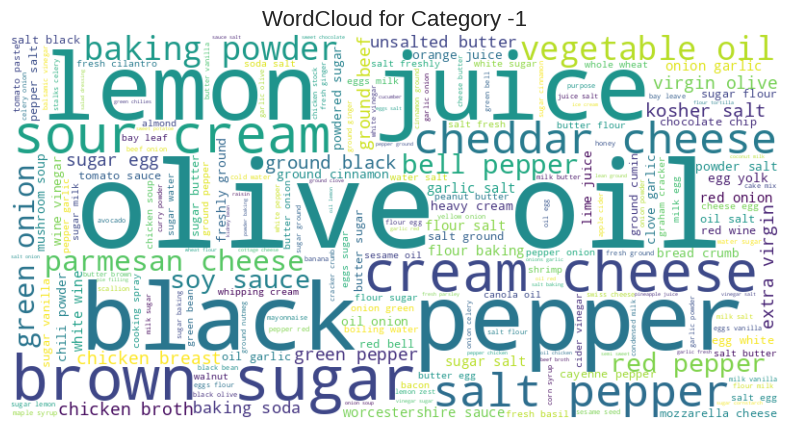

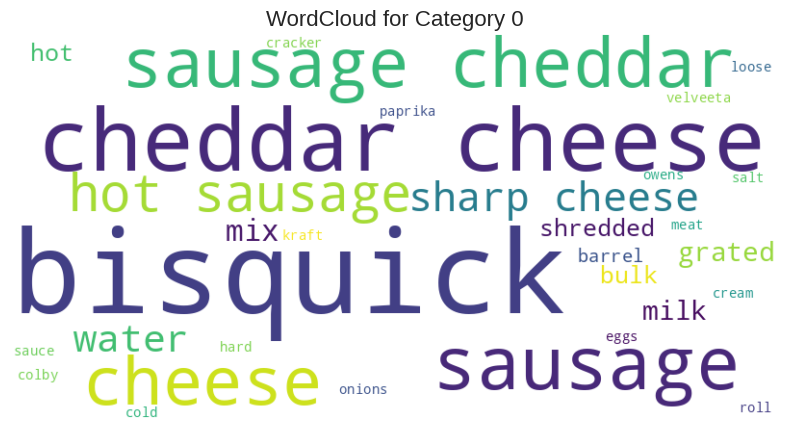

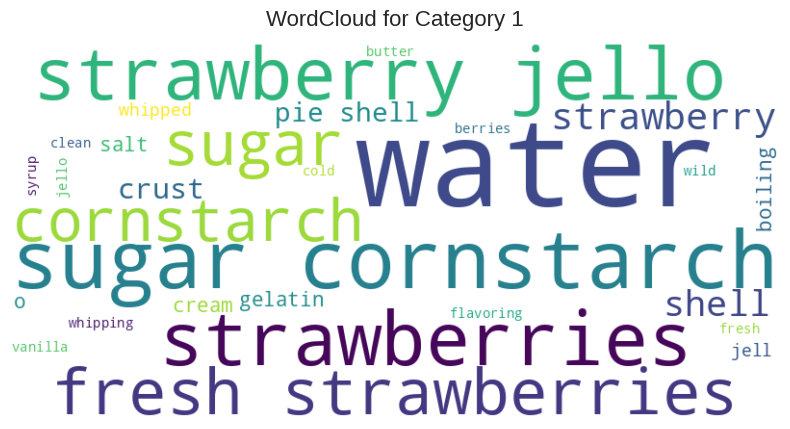

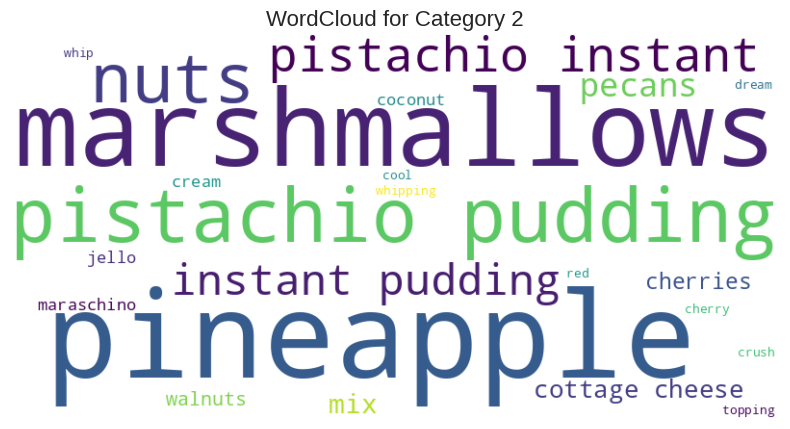

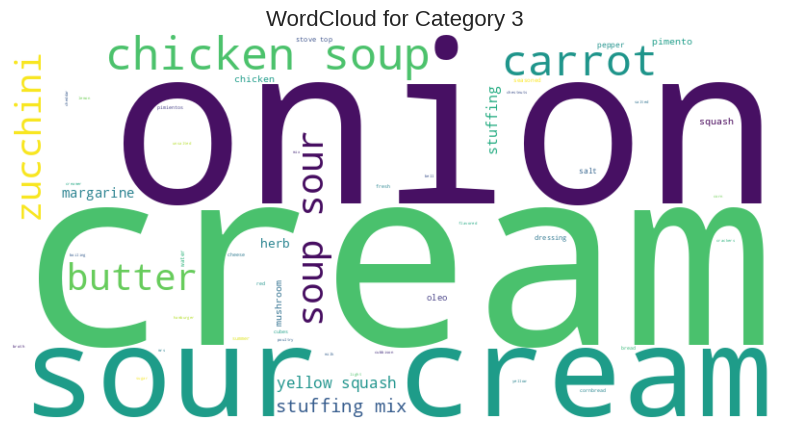

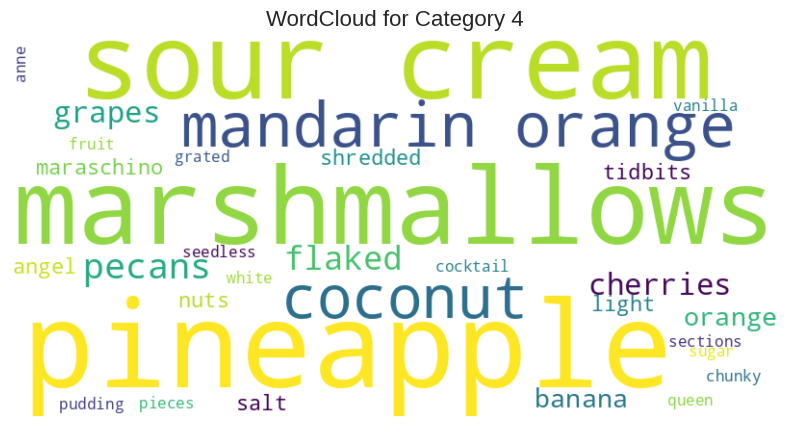

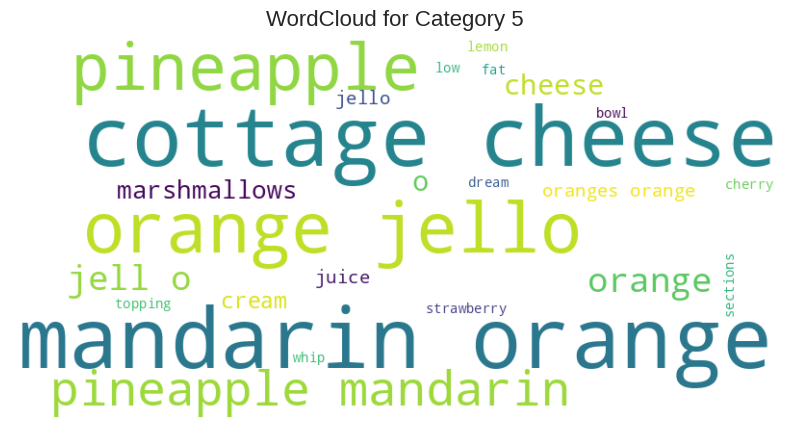

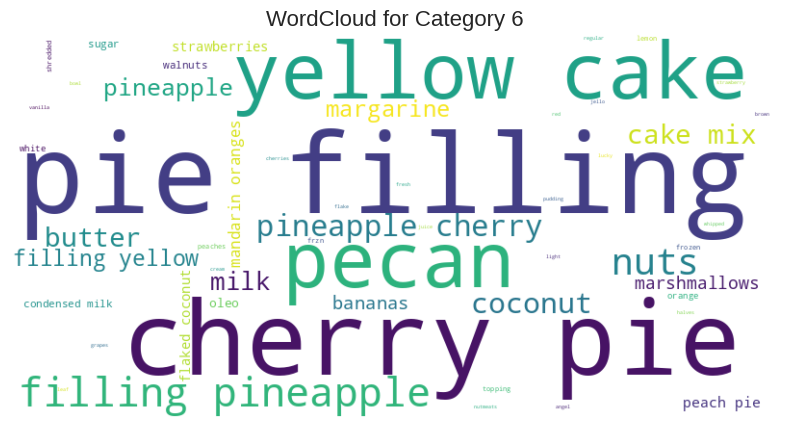

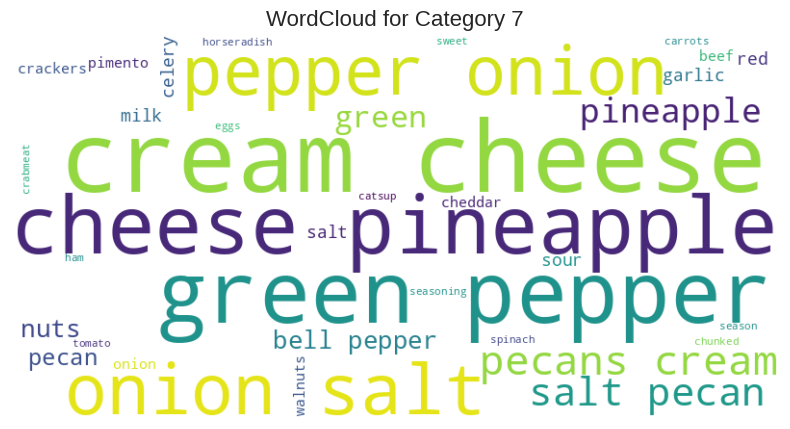

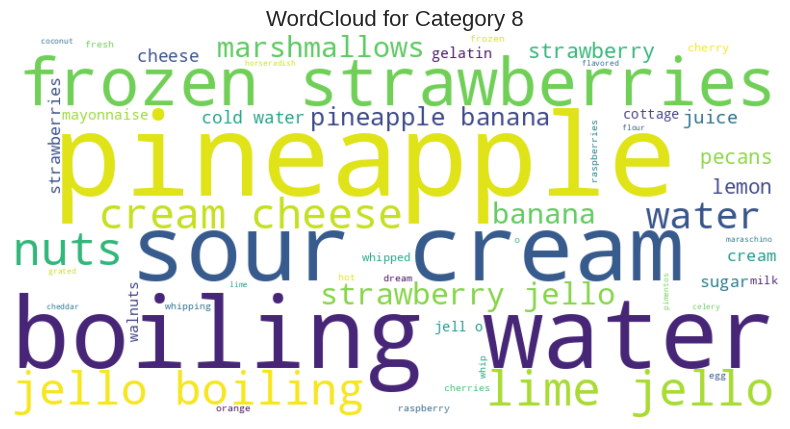

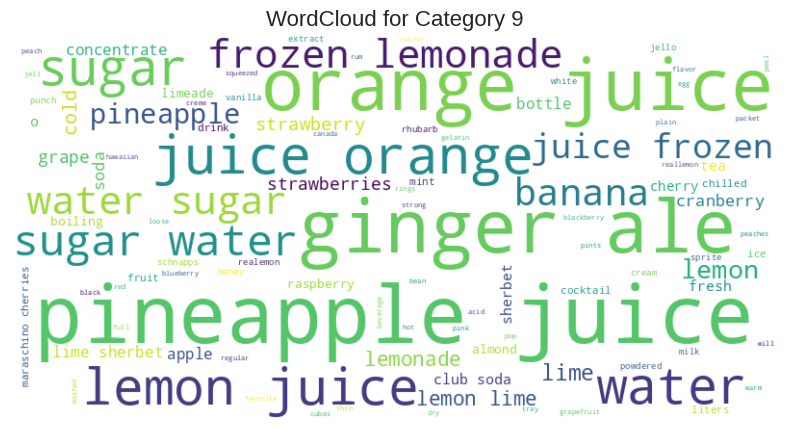

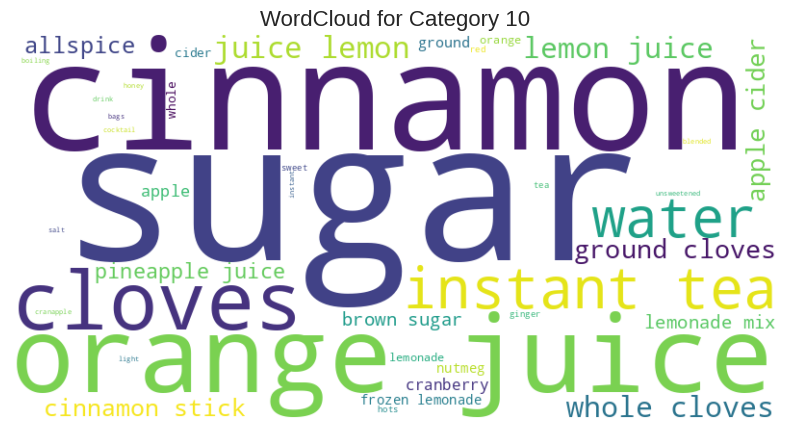

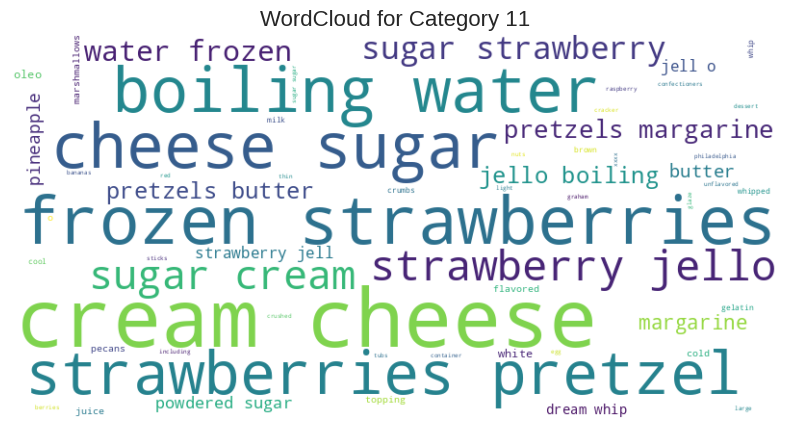

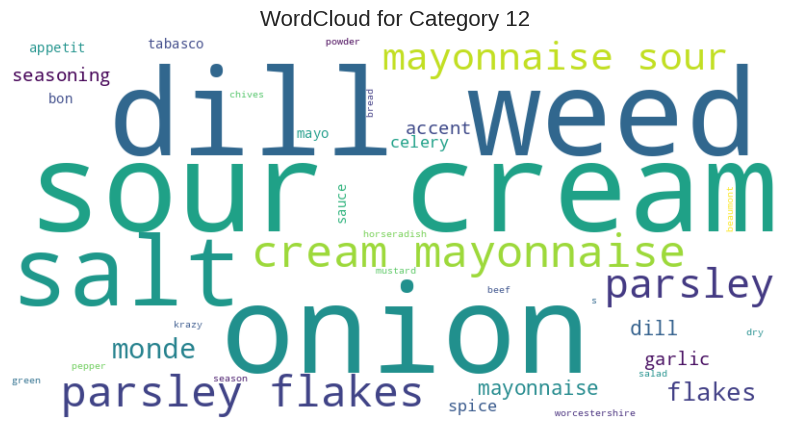

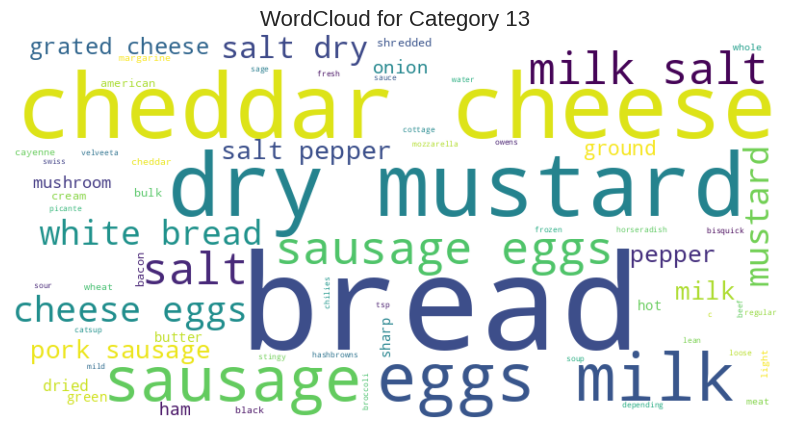

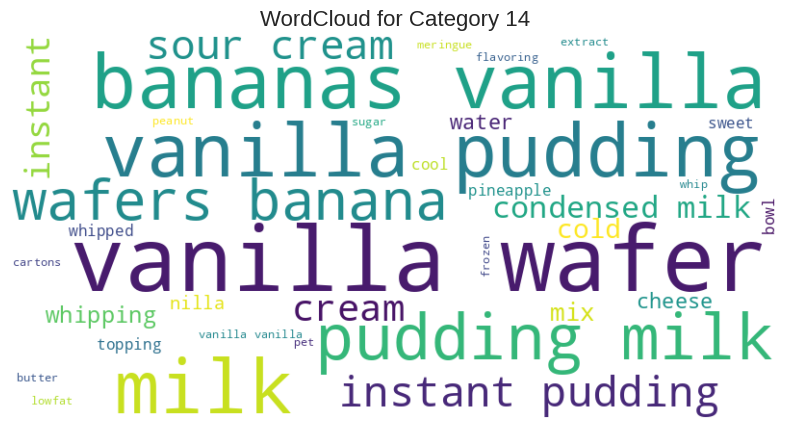

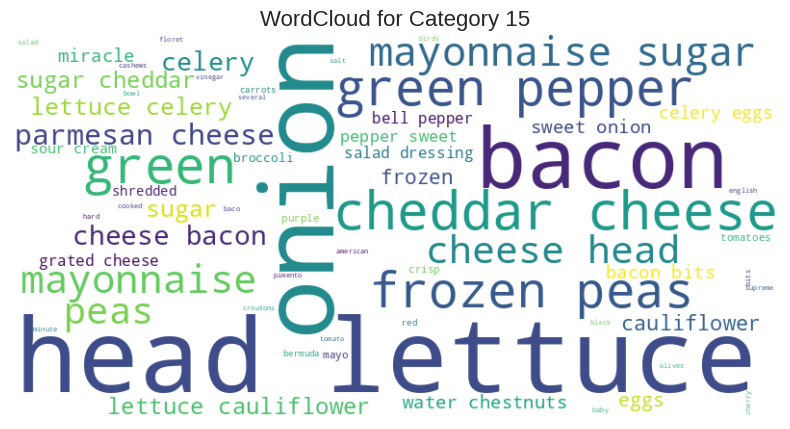

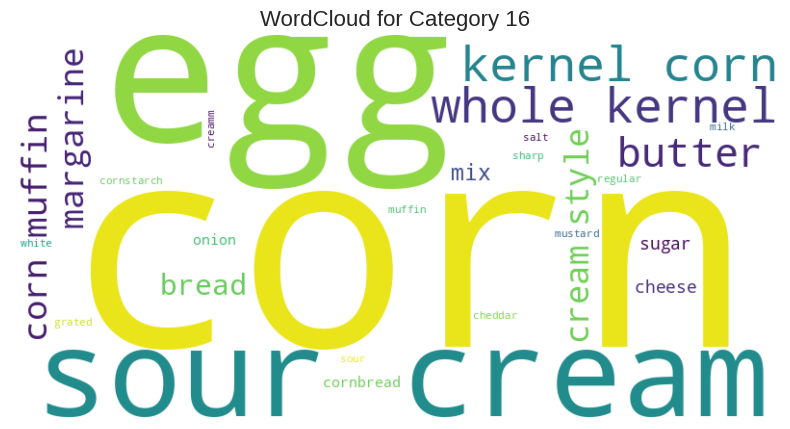

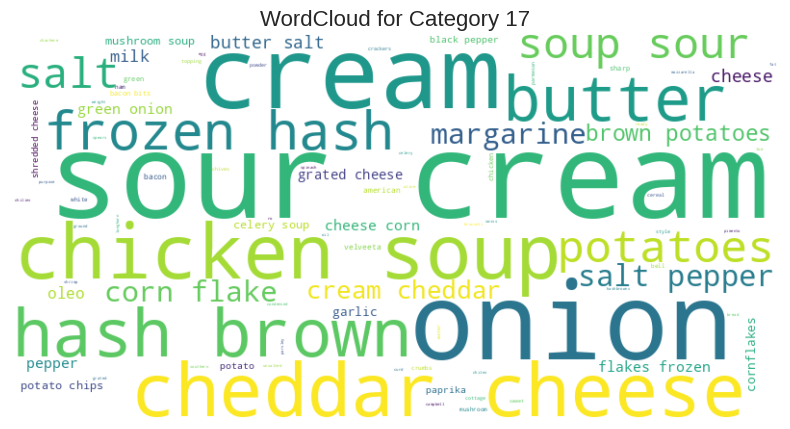

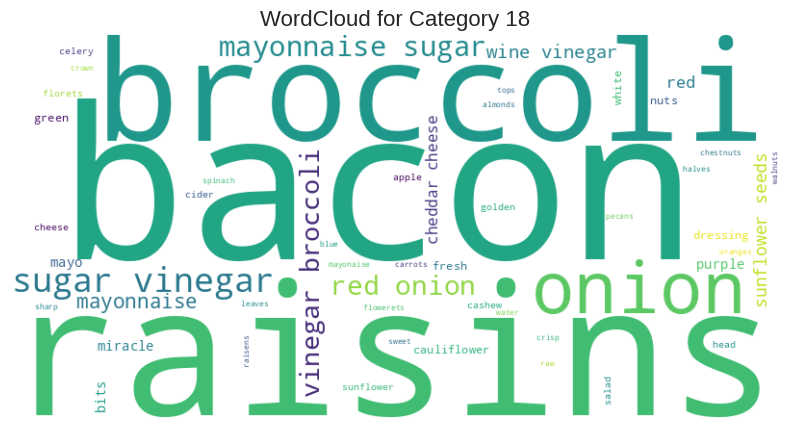

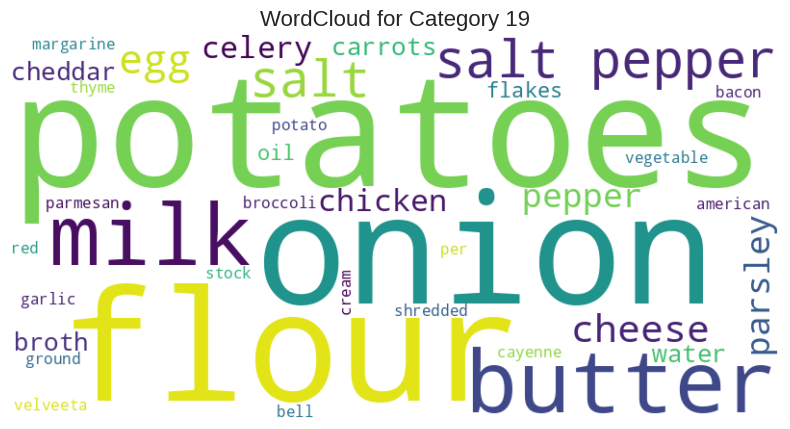

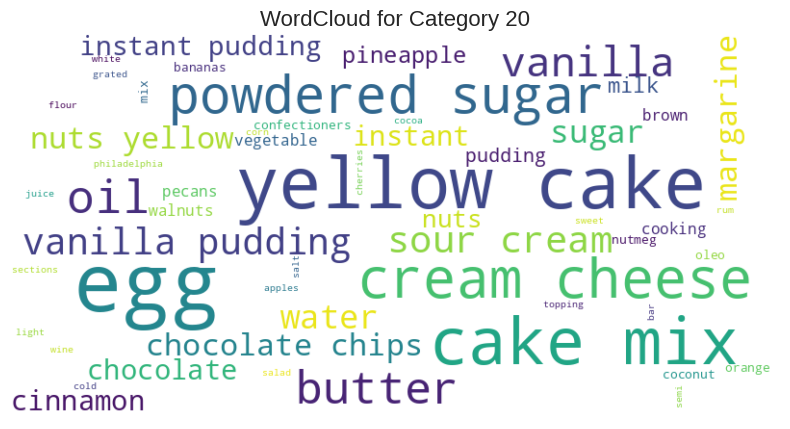

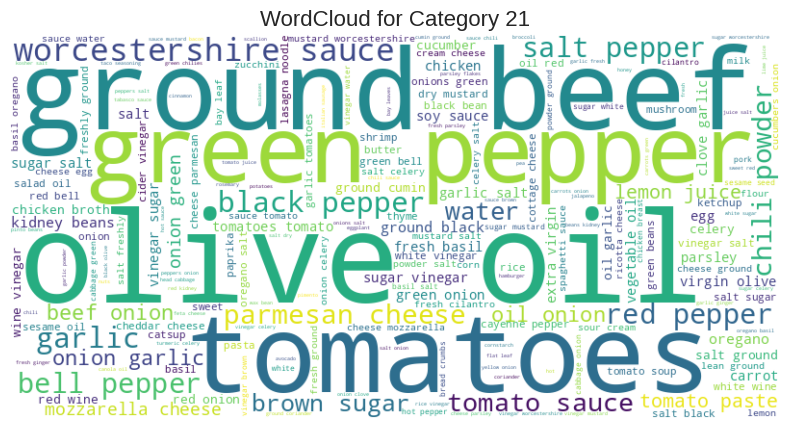

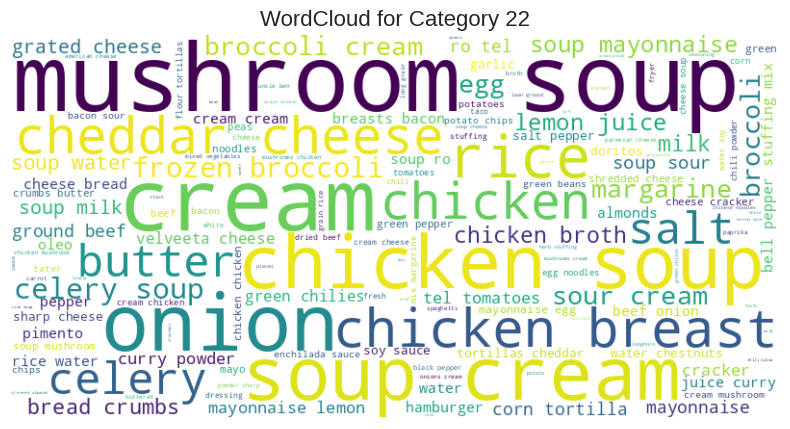

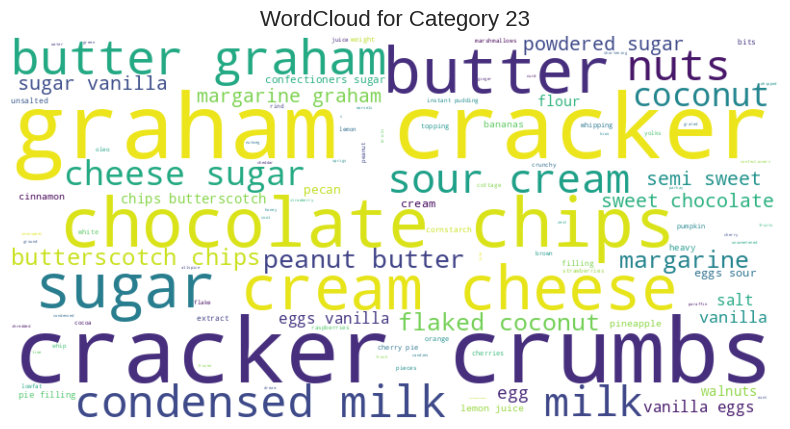

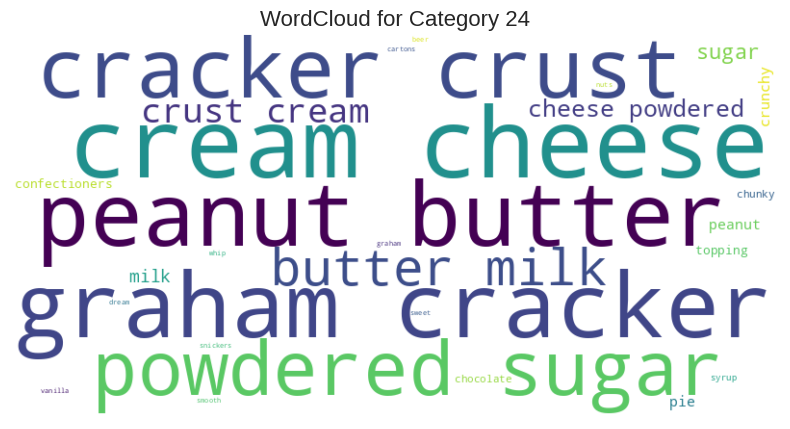

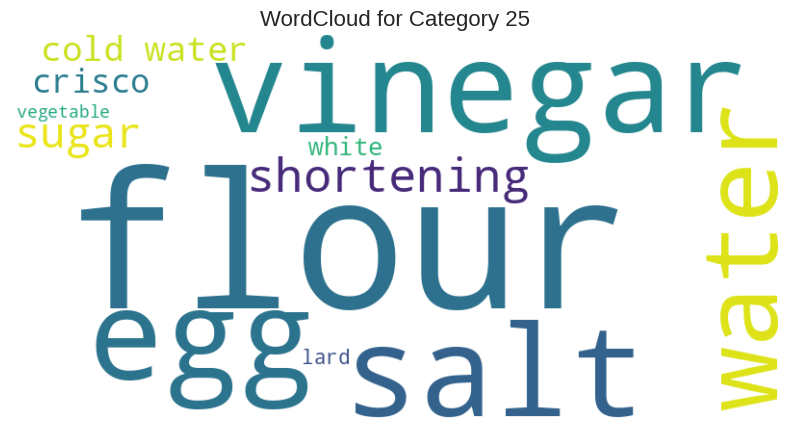

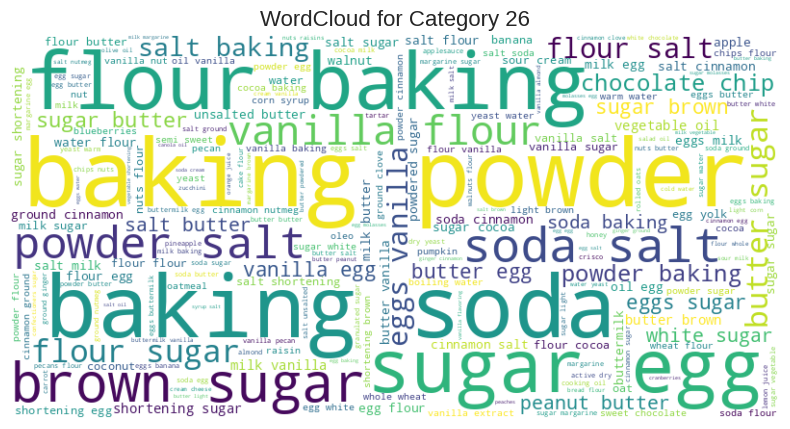

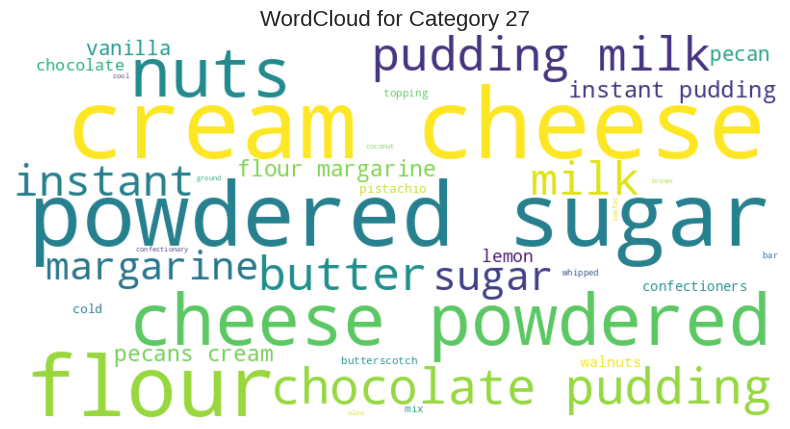

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Group by label and generate word clouds
unique_labels = df['categories'].unique()

for label in sorted(unique_labels):
    # Filter rows with this label
    label_data = df[df['categories'] == label]

    # Combine all NER tokens into a single string
    all_words = ','.join(label_data['normalized_ner'].dropna()).replace(',', ' ')

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    wordcloud.to_file(f'/content/sample_data/wordcloud_label_{label}.png')

    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for Category {label}', fontsize=16)
    plt.show()

In [40]:
label_to_category = {
    -1: 'General/Noise Cluster',
    0: 'Savory Casseroles & Soups',
    1: 'Fruit Jello / Dessert Salads',
    2: 'Fruit Jello / Dessert Salads',
    3: 'Savory Casseroles & Soups',
    4: 'Fruit Jello / Dessert Salads',
    5: 'Fruit Jello / Dessert Salads',
    6: 'Pie / Crust Desserts',
    7: 'Appetizer Spreads',
    8: 'Fruit Jello / Dessert Salads',
    9: 'Punches & Drinks',
    10: 'Punches & Drinks',
    11: 'Fruit Jello / Dessert Salads',
    12: 'Cold Layered / Vegetable Salads',
    13: 'Savory Casseroles & Soups',
    14: 'Fruit Jello / Dessert Salads',
    15: 'Cold Layered / Vegetable Salads',
    16: 'Savory Casseroles & Soups',
    17: 'Savory Casseroles & Soups',
    18: 'Cold Layered / Vegetable Salads',
    19: 'Savory Casseroles & Soups',
    20: 'Baking & Cake Mix Desserts',
    21: 'Hearty Mains / Meat-Based',
    22: 'Savory Casseroles & Soups',
    23: 'Pie / Crust Desserts',
    24: 'Pie / Crust Desserts',
    25: 'Pie / Crust Desserts',
    26: 'Baking & Cake Mix Desserts',
    27: 'Baking & Cake Mix Desserts'
}

df['label_category'] = df['categories'].map(label_to_category)

In [41]:
df['label_category'].value_counts()

label_category
General/Noise Cluster              102704
Baking & Cake Mix Desserts           7252
Hearty Mains / Meat-Based            2446
Savory Casseroles & Soups            1101
Fruit Jello / Dessert Salads          336
Pie / Crust Desserts                  292
Punches & Drinks                      262
Cold Layered / Vegetable Salads       183
Appetizer Spreads                      55
Name: count, dtype: int64

In [43]:
#df.to_csv('data_with_nutrients_final_with_categories.csv', index=False)

In [94]:
temp = pd.read_csv('data_with_nutrients_final_with_categories.csv')
temp.head()

ingredients  \
0  ["6 cups rice krispies", "2 cups reese's peanu...   
1  ["4 boneless skinless chicken breasts", "6 spr...   
2  ["1 (7 1/2 ounce) can refrigerated biscuits", ...   
3  ["2 pounds ground beef or turkey", "2 pounds r...   
4  ["3 lbs beef round steak", "all-purpose flour"...   

                                          directions  \
0  ["combine the rice krispies and chopped peanut...   
1  ["heat the oven to 350 degree f/180 degrees c....   
2  ["melt oleo.", "dip each biscuit in oleo, then...   
3  ["brown meat in a kettle with a little oil", "...   
4  ["cut steaks into strips measuring 3 to 4 inch...   

                                                 NER  ingredients_count  \
0  ["rice krispies", "miniatures", "marshmallows"...                  8   
1  ["chicken breasts", "oregano", "onion", "garli...                 18   
2  ["refrigerated biscuits", "oleo", "brown sugar...                  5   
3  ["ground beef", "beef", "garlic", "paprika", "...                 21   
4  ["beef round steak", "flour", "salt", "onion",...                  9   

   NER_count  directions_count  \
0          6             219.0   
1         13             131.0   
2          5              44.0   
3         15              73.0   
4          8             290.0   

                              normalized_ingredients  \
0  6 cup rice krispies, 2 cup reeses peanut butte...   
1  4 boneless skinless chicken breasts, 6 sprigs ...   
2  1 (7.5 ounce) can refrigerated biscuits, 1 cup...   
3  2 pounds ground beef or turkey, 2 pounds round...   
4  3 lbs beef round steak, all-purpose flour, sal...   

                               normalized_directions  calories  protein_g  \
0  combine the rice krispies and chopped peanut b...    5950.0       85.0   
1  heat the oven to 350 degree f/180 degrees cels...    2600.0      280.0   
2  melt oleo, dip each biscuit in oleo, then brow...    2800.0       25.0   
3  brown meat in a kettle with a little oil, add ...    5700.0      500.0   
4  cut steaks into strips measuring 3 to 4 inches...    3500.0      400.0   

   carbs_g  fat_g  fiber_g  sugar_g  \
0    750.0  300.0     25.0    480.0   
1    280.0   60.0     40.0     50.0   
2    300.0  180.0     15.0    200.0   
3    400.0  250.0    100.0    100.0   
4     80.0  150.0     10.0     30.0   

                                      normalized_ner  categories  \
0  rice krispies, miniatures, marshmallows, choco...          -1   
1  chicken breasts, oregano, onion, garlic, tomat...          -1   
2  refrigerated biscuits, oleo, brown sugar, nuts...          -1   
3  ground beef, beef, garlic, paprika, oregano, c...          21   
4  beef round steak, flour, salt, onion, bacon, v...          -1   

              label_category  
0      General/Noise Cluster  
1      General/Noise Cluster  
2      General/Noise Cluster  
3  Hearty Mains / Meat-Based  
4      General/Noise Cluster

In [95]:
temp.directions_count = temp.normalized_directions.apply(lambda x: len(x.split(',')))

In [96]:
temp.ingredients_count = temp.normalized_ner.apply(lambda x: len(x.split(',')))

In [97]:
temp = temp[(temp['ingredients_count'] >= 4) & (temp['ingredients_count'] <= 15)]

In [98]:
temp.shape

(102577, 17)

In [99]:
temp = temp[(temp['directions_count'] >= 3)]

In [100]:
temp.shape

(94754, 17)

In [101]:
temp[temp['label_category'] != 'General/Noise Cluster']['label_category'].value_counts().sum()

np.int64(10531)

In [102]:
temp = temp[temp['label_category'] != 'General/Noise Cluster']

In [103]:
temp['label_category'].value_counts()

label_category
Baking & Cake Mix Desserts         6713
Hearty Mains / Meat-Based          2017
Savory Casseroles & Soups           923
Fruit Jello / Dessert Salads        264
Pie / Crust Desserts                250
Punches & Drinks                    201
Cold Layered / Vegetable Salads     128
Appetizer Spreads                    35
Name: count, dtype: int64

<Axes: >

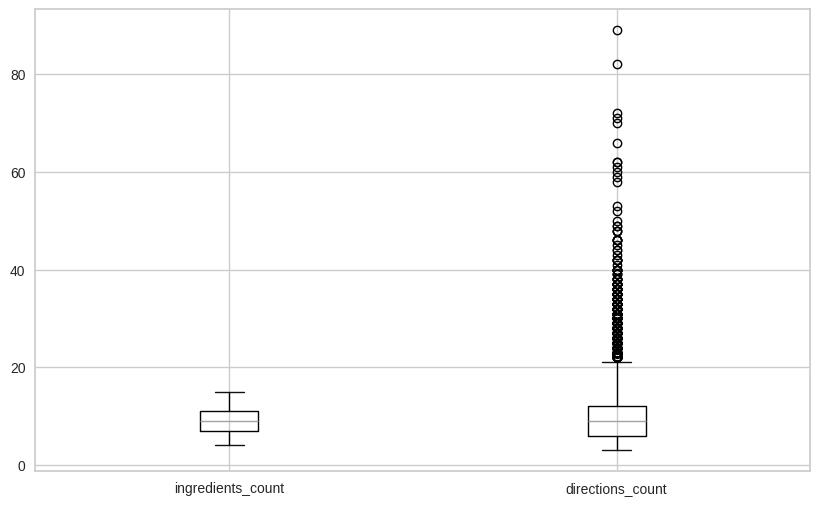

In [104]:
temp.boxplot(column=['ingredients_count', 'directions_count'], figsize=(10, 6))

In [105]:
# Compute Q1, Q3, and IQR
Q1 = temp['directions_count'].quantile(0.25)
Q3 = temp['directions_count'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
temp = temp[(temp['directions_count'] >= lower_bound) & (temp['directions_count'] <= upper_bound)]

<Axes: >

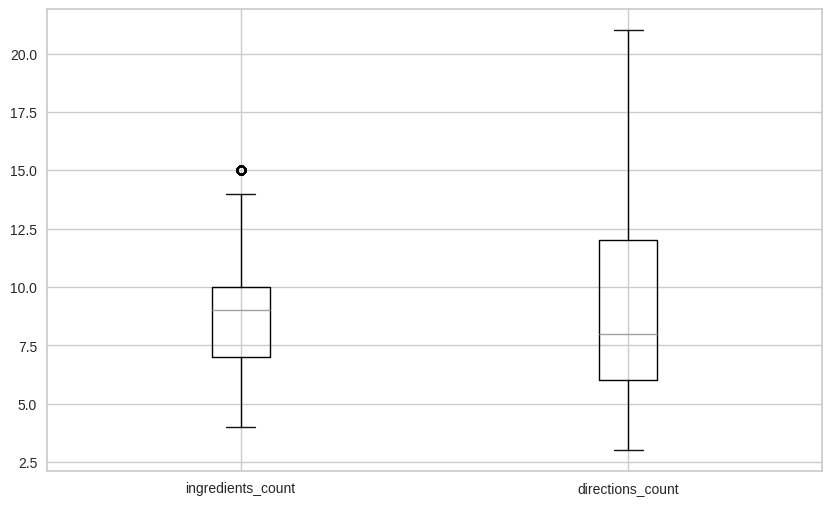

In [106]:
temp.boxplot(column=['ingredients_count', 'directions_count'], figsize=(10, 6))

In [107]:
temp['label_category'].value_counts().sum()

np.int64(10015)

In [111]:
temp.groupby(['ingredients_count', 'directions_count'])['normalized_directions'].count()

ingredients_count  directions_count
4                  3                   29
                   4                   26
                   5                   29
                   6                   28
                   7                   22
                                       ..
15                 17                  12
                   18                   3
                   19                   6
                   20                   5
                   21                   6
Name: normalized_directions, Length: 222, dtype: int64

In [112]:
temp['instruction'] = 'You are an expert chef. Using the ingredients below, write a delicious food recipe.'

In [114]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(temp, test_size=500, random_state=42, stratify=temp['label_category']) # get train and test datasets 9500 to 500 approximately

In [115]:
train['label_category'].value_counts()

label_category
Baking & Cake Mix Desserts         6064
Hearty Mains / Meat-Based          1753
Savory Casseroles & Soups           872
Fruit Jello / Dessert Salads        251
Pie / Crust Desserts                229
Punches & Drinks                    191
Cold Layered / Vegetable Salads     122
Appetizer Spreads                    33
Name: count, dtype: int64

In [116]:
test['label_category'].value_counts()

label_category
Baking & Cake Mix Desserts         319
Hearty Mains / Meat-Based           92
Savory Casseroles & Soups           46
Fruit Jello / Dessert Salads        13
Pie / Crust Desserts                12
Punches & Drinks                    10
Cold Layered / Vegetable Salads      6
Appetizer Spreads                    2
Name: count, dtype: int64

In [117]:
train = train[['instruction', 'normalized_ner', 'normalized_directions']].rename(columns={'normalized_ner': 'input', 'normalized_directions': 'output'})
test = test[['instruction', 'normalized_ner', 'normalized_directions']].rename(columns={'normalized_ner': 'input', 'normalized_directions': 'output'})

In [118]:
train.head()

instruction  \
114516  You are an expert chef. Using the ingredients ...   
68399   You are an expert chef. Using the ingredients ...   
35570   You are an expert chef. Using the ingredients ...   
31701   You are an expert chef. Using the ingredients ...   
21802   You are an expert chef. Using the ingredients ...   

                                                    input  \
114516  green cabbage, onion, green bell pepper, carro...   
68399   sugar, margarine, cocoa, milk, vanilla, peanut...   
35570   white vinegar, sugar, salt, turmeric, celery, ...   
31701   shortening, vanilla, brown sugar, eggs, pumpki...   
21802   apple cider, sugar, cloves, orange juice, alls...   

                                                   output  
114516  toss all vegetables in a large bowl with 1 tea...  
68399   mix sugar, margarine, cocoa and milk, bring to...  
35570   boil first 5 ingredients together, cool, pour ...  
31701   preheat oven to 350\u00b0, grease jelly roll p...  
21802   completely dissolve the sugar and orange juice...

In [119]:
test.head()

instruction  \
12521   You are an expert chef. Using the ingredients ...   
37529   You are an expert chef. Using the ingredients ...   
37268   You are an expert chef. Using the ingredients ...   
109527  You are an expert chef. Using the ingredients ...   
23007   You are an expert chef. Using the ingredients ...   

                                                    input  \
12521   peach pie filling, pineapple, strawberries, ma...   
37529   graham cracker crumbs, butter, sugar, cream ch...   
37268   butter, brown sugar, sugar, vanilla, eggs, flo...   
109527  flour, cocoa, baking powder, salt, eggs, sugar...   
23007   eggs, milk, bread crumbs, onion, salt, sage, g...   

                                                   output  
12521   to peach pie filling, add pineapple in syrup, ...  
37529   mix crust ingredients together, until coated a...  
37268   beat margarine, sugar, vanilla and eggs until ...  
109527  preheat oven to 325*. combine flour, cocoa, ba...  
23007   cut three 25x3-in. strips of heavy-duty foil; ...

In [120]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [124]:
train.index, test.index

(RangeIndex(start=0, stop=9515, step=1), RangeIndex(start=0, stop=500, step=1))

In [125]:
from datasets import Dataset

train_ds = Dataset.from_pandas(train)
test_ds = Dataset.from_pandas(test)

In [126]:
train_ds

Dataset({
    features: ['instruction', 'input', 'output'],
    num_rows: 9515
})

In [127]:
test_ds

Dataset({
    features: ['instruction', 'input', 'output'],
    num_rows: 500
})

In [128]:
train_ds.to_parquet('train.parquet')
test_ds.to_parquet('test.parquet')

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

263281